# 1. Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# 2. Basic questions

### Que-1 
##### What are the top 5 zipcodes for 911 calls? **

In [6]:
dfre = pd.DataFrame(df['zip'].value_counts().head(5))
dfre.rename(columns = {'zip':'Top 5'},inplace=True)
dfre.style.background_gradient(cmap='Blues')

,Top 5
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


### Que-2
##### What are the top 5 townships (twp) for 911 calls?

In [7]:
df_twp = pd.DataFrame(df['twp'].value_counts().head(5))
df_twp.rename(columns={'twp':'Top 5'},inplace= True)
df_twp.style.background_gradient(cmap='Greens')

,Top 5
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


### Que-3  
##### Take a look at the 'title' column, how many unique title codes are there?

In [8]:
df['title'].nunique()

110

# 3. Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I used the  .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. 

In [9]:
df['Reasons'] = df['title'].apply(lambda x : x.split(':')[0])

In [10]:
df['Reasons']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reasons, Length: 99492, dtype: object

In [11]:
df.head() #we can see that in this DataFrame we have added another column named Reasons

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


##### What is the most common Reason for a 911 call based off of this new column? 

In [12]:
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

##### Now I use seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reasons', ylabel='count'>

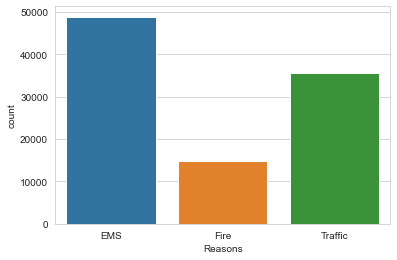

In [13]:
sns.countplot(x='Reasons',data=df)

# 4. Overall 911 Emergency Calls

The barcahrt shows the **top 10 emergency calls** from all the categories.

* Vehicle accidents are the number one reason people call 911.
* Disabled vehicle and fire alarm are in second and third place.

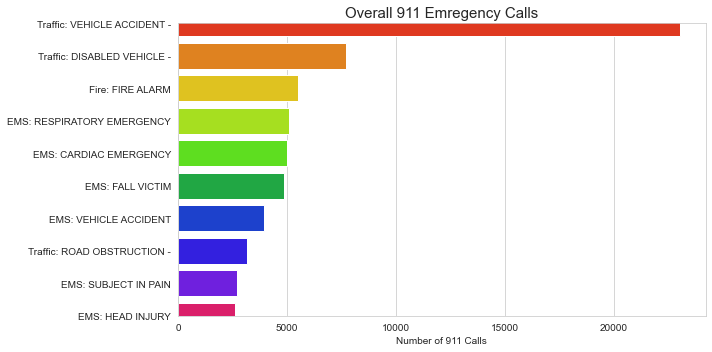

In [14]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data = df, order = df['title'].value_counts().index,palette='prism')
axes.set_ylim([9,0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

### Traffic 911 Emergency Calls
* The most common emergency titles are vehicle accident, disable vehicle and road obstruction.

Text(0.5, 1.0, 'Traffic 911 Emergency Calls')

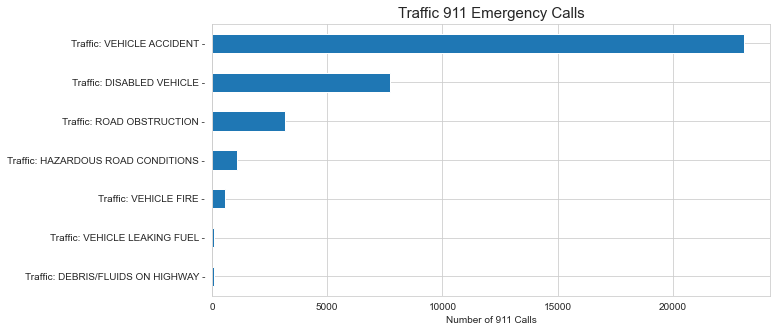

In [15]:
df[df['Reasons']=='Traffic'].groupby('title').count()['lat'].sort_values(ascending=True).plot(kind='barh',figsize=(10,5))
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)

### Fire 911 Emergency Calls
* The most common emergency titles are fire alarm, vehicle accident and fire investigation.

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

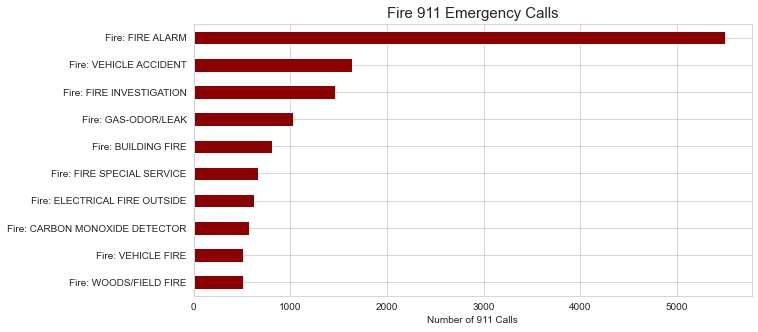

In [16]:
df[df['Reasons']=='Fire'].groupby('title').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(10,5),color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

### EMS 911 Emergency Calls
* The most common emergency titles are fall victim, respiratory emergency and cardiac emergency.

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

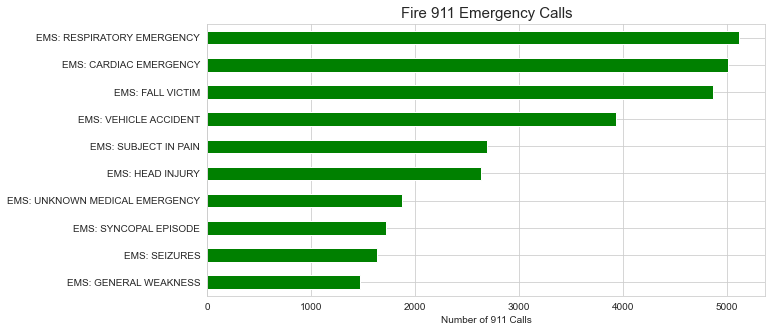

In [17]:
df[df['Reasons']=='EMS'].groupby('title').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(10,5),color='green')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

# 5. Feature Engineering

   ### Timestamp feature

_____
#### What is the data type of the objects in the timeStamp column?

In [18]:
type(df['timeStamp'].iloc[0]) # we can see that it has a string object

str

#### Now I Use 'pd.to_datetime' to convert the column from strings to DateTime objects. 

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

 ** we can now grab specific attributes from a Datetime object by calling them. For example:**  
   
       time = df['timeStamp'].iloc[0]
       time.hour
       (hour,minute,second,dayofweek,month,date)
     
#### We can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects,I  use .apply() to create 3 new columns called Hour, Month, and Day of Week. I will create these columns based off of the timeStamp column.

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### We can notice in the above DataFrame that Day of Week is an integer between 0-6.I Use the .map() with this dictionary to map the actual string names to the day of the week.

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [23]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


##### ** Now I use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

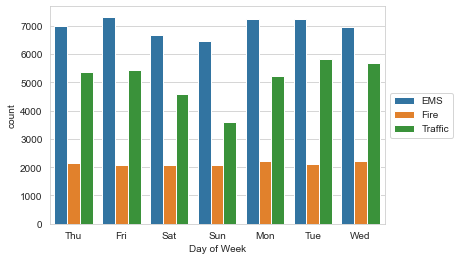

In [24]:
sns.countplot(x='Day of Week', data=df ,hue='Reasons')

# To relocate the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### ** Now I use seaborn to create a countplot of the Month column with the hue based off of the Reason column. **

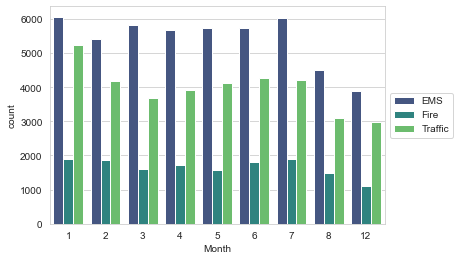

In [25]:
sns.countplot(x='Month', data=df ,hue='Reasons',palette='viridis')

# To relocate the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### There is something strange about the Plot.

** We can notice that some Months are missing from the Plot, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now I create a gropuby object called byMonth, where I group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [26]:
byMonth = df.groupby('Month').count()

In [27]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

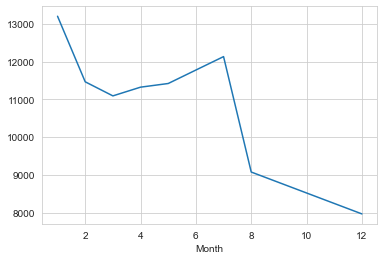

In [28]:
byMonth['twp'].plot()

Still not clear what are the values of the missing months so,

#### Now I use seaborn's lmplot() to create a linear fit on the number of calls per month. I had to reset the index to a column. 

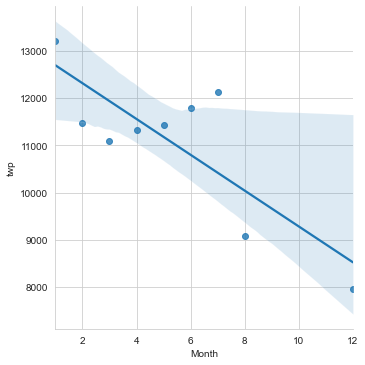

In [29]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
# The shaded area shows the error in the plot and as there is less data points error grows

#### Created a new column called 'Date' that contains the date from the timeStamp column. I had to use apply along with the .date() method.

In [30]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


<AxesSubplot:xlabel='Date'>

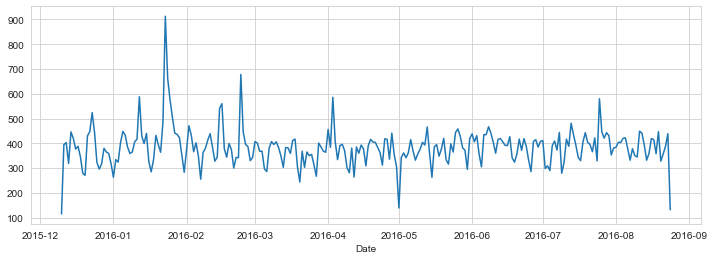

In [32]:
plt.figure(figsize=(12,4))
df.groupby('Date').count()['twp'].plot()

### Now I recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.

Text(0.5, 1.0, 'Traffic')

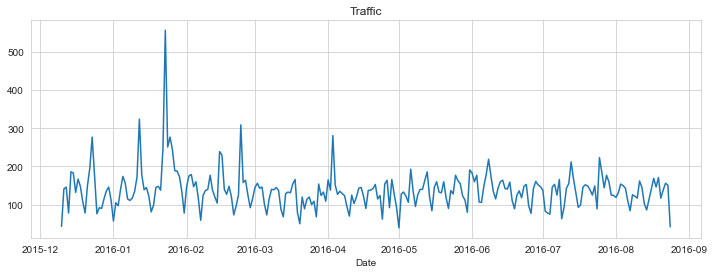

In [33]:
plt.figure(figsize=(12,4))
df[df['Reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

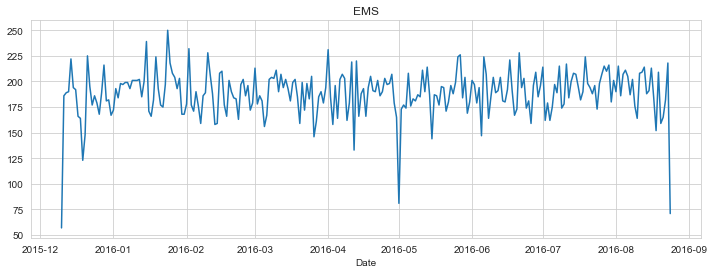

In [34]:
plt.figure(figsize=(12,4))
df[df['Reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

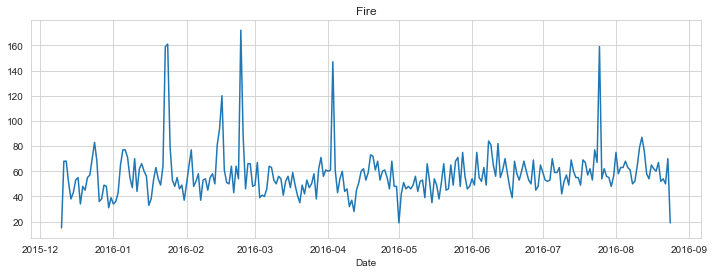

In [35]:
plt.figure(figsize=(12,4))
df[df['Reasons']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

# 6. HeatMap

___
### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [36]:
df2 = df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
df2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

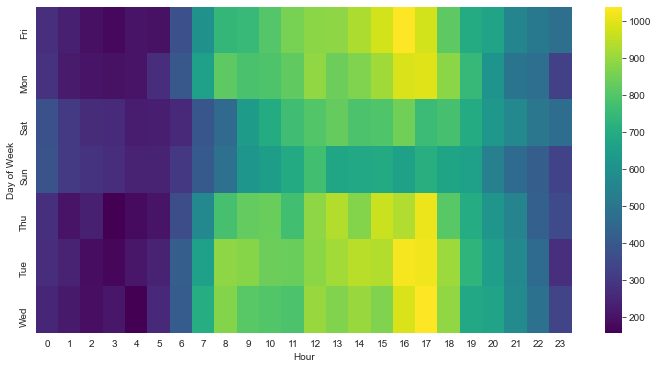

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df2,cmap='viridis')

#### As we can see that most of the calls happen during the Evening time and not during Early Hours of the day and as these calls are not due to crimes but due to EMS, Fire & Traffic Which mostly happens during Day time. And not a lot of these activity dont happen on Sunday & Saturday as those are Holiday and People step out of their house very less.

### Now creating a clustermap using this DataFrame.
And to show that calls mostly happens during rest of the days and not on sunday and saturday

<Figure size 864x432 with 0 Axes>

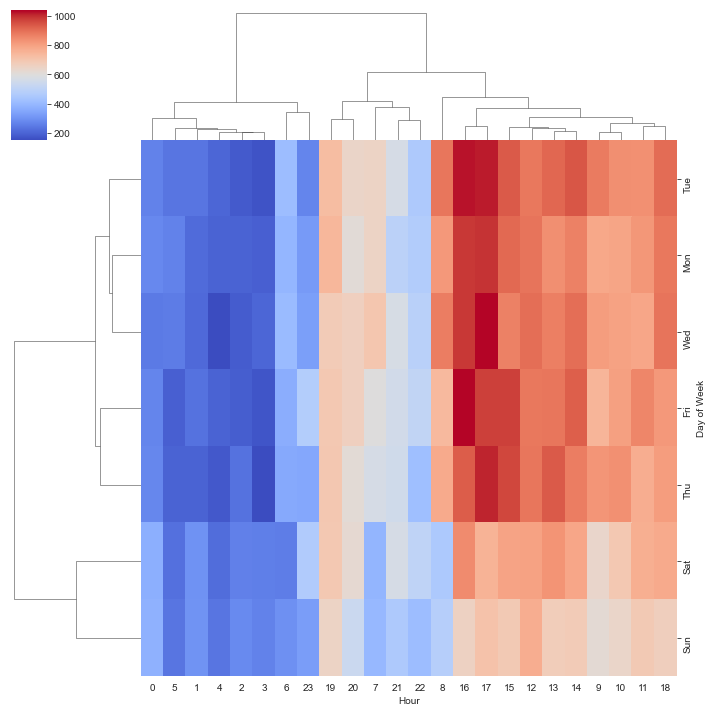

In [38]:
plt.figure(figsize=(12,6))
sns.clustermap(df2,cmap='coolwarm')

     High amount of calls happens during evening hours and on Monday to Friday and less amount of calls during Early hours   and on Saturday and Sunday

### Now I have repeated these same plots and operations, for a DataFrame that shows the Month as the column.

In [39]:
df3 = df.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()
df3

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

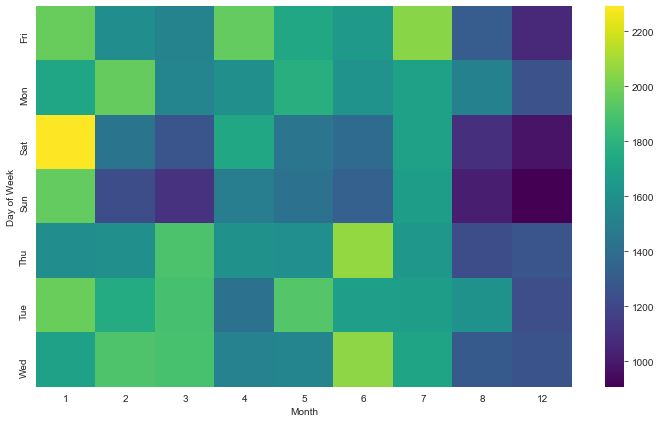

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(df3,cmap='viridis')

<Figure size 864x504 with 0 Axes>

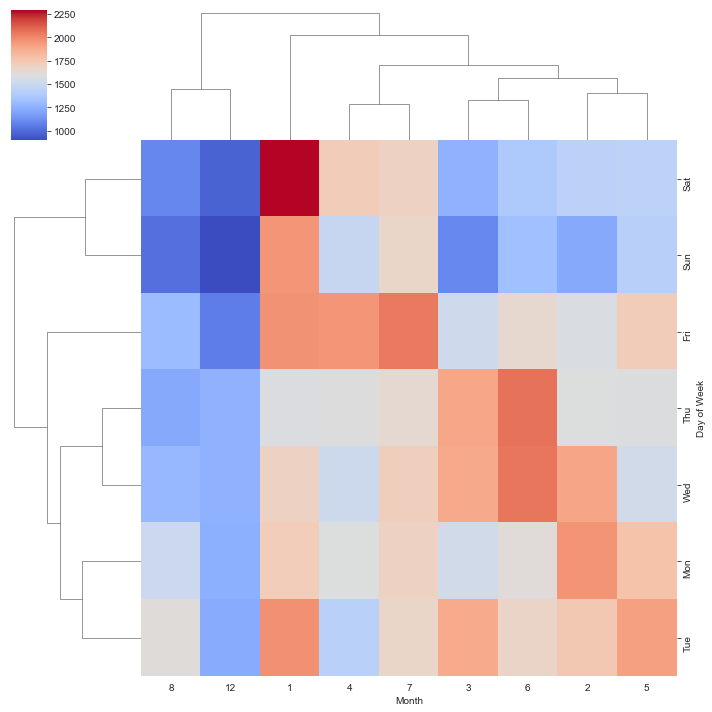

In [41]:
plt.figure(figsize=(12,7))
sns.clustermap(df3,cmap='coolwarm')

### As we can see that most of the calls happens during summer months but interesting fact is that the higest no. of calls has happend during January Month as it is a new year month and people tend to have partys  and it increasingly happens on saturday.